In [1]:
from kaggle_environments import make
import numpy as np
import gym
import torch

from Scripts.MCTS import agent_mcts
from Scripts.Deep_Q_Learning import DQN
import matplotlib.pyplot as plt
from Scripts.training import train_agent,load_agent
from Scripts.test_model import test_agent
from Scripts.training import save_agent

from tqdm import tqdm

Loading environment lux_ai_s2 failed: No module named 'vec_noise'


# 0. Initialisating the environment

In [2]:
cols = 7
rows = 6
env = make("connectx", configuration={"rows":rows, "columns":cols})

In [17]:
LOAD_MODEL_agent1 = True
LOAD_MODEL_agent2 = True


PATH_TO_LOAD = "models/"
NAME_AGENT_1 = "1v2_ep20.pt"
NAME_AGENT_2 = "2v1_ep20.pt"


if(LOAD_MODEL_agent1):
    agent1 = load_agent(PATH_TO_LOAD+NAME_AGENT_1)
else :
    agent1 = DQN()


if(LOAD_MODEL_agent2):
    agent2 = load_agent(PATH_TO_LOAD+NAME_AGENT_2)
else:
    agent2 = DQN()

# 1. Training against Random

In [6]:
RANDOM_EPOCHS = 1

In [8]:
agent1 = train_agent(env,agent1,"random",n_player=1,epochs=RANDOM_EPOCHS,display_info=False, save=False)
agent2 = train_agent(env,agent2,"random",n_player=2,epochs=RANDOM_EPOCHS,display_info=False, save=False)

# 2. Adversarial training

In [9]:
def create_agent_against(agent):
    def dqn_agent(obs,config):
        agent_b = DQN()
        agent_b.network = agent.network
        return agent.choose_action(obs,test_agent = True)
    return dqn_agent

In [5]:
ADVERSARIAL_EPOCHS = 10
NB_SWITCH = 2

FOLLOW_TRAINING = False
NB_GAMES_TEST = 10

In [12]:
history_random = []
history_MCTS = []
history_negamax = []

for i in tqdm(range(NB_SWITCH)):
    agent1 = train_agent(env,agent1,create_agent_against(agent2),n_player=1,epochs=ADVERSARIAL_EPOCHS,display_info=False)
    agent2 = train_agent(env,agent2,create_agent_against(agent1),n_player=2,epochs=ADVERSARIAL_EPOCHS,display_info=False)

    if FOLLOW_TRAINING:
        current_history_random = test_agent(env,agent1,"random",n_player=1,nb_games=NB_GAMES_TEST)
        current_history_MCTS = test_agent(env,agent1,agent_mcts,n_player=1,nb_games=NB_GAMES_TEST)
        current_history_negamax = test_agent(env,agent1,"negamax",n_player =1, nb_games=NB_GAMES_TEST)
    
        history_random.append(current_history_random[1]/NB_GAMES_TEST*100)
        history_MCTS.append(current_history_MCTS[1]/NB_GAMES_TEST*100)
        history_negamax.append(current_history_negamax[1]/NB_GAMES_TEST*100)

100%|██████████| 2/2 [00:17<00:00,  8.93s/it]


# 3. Testing Agents

In [6]:
NB_GAMES_TEST = 10

### 3.1 Against random

In [ ]:
history_random = test_agent(env,agent1,"random",n_player=1,nb_games=NB_GAMES_TEST)
plt.plot(history_random)

### 3.2 Against MCTS

In [ ]:
history_MCTS = test_agent(env,agent1,agent_mcts,n_player=1,nb_games=NB_GAMES_TEST)
plt.plot(history_MCTS)

### 3.3 Against MCTS

In [ ]:
history_negamax = test_agent(env,agent1,"negamax",n_player =1, nb_games=NB_GAMES_TEST)
plt.plot(history_negamax)

# 4. Saving Agents

In [ ]:
SAVE = True
PATH_TO_SAVE = "models/"

NAME1 = "1v2_ep"+ str(NB_SWITCH*ADVERSARIAL_EPOCHS)
NAME2 = "2v1_ep"+ str(NB_SWITCH*ADVERSARIAL_EPOCHS)

In [3]:
if SAVE :
    save_agent(agent1, path_to_save=PATH_TO_SAVE, name=NAME1, epochs=NB_SWITCH*ADVERSARIAL_EPOCHS)
    save_agent(agent2, path_to_save=PATH_TO_SAVE, name=NAME2, epochs=NB_SWITCH*ADVERSARIAL_EPOCHS)

NameError: name 'SAVE' is not defined

# 3. Testing efficiency of the training against rd

In [ ]:
EPOCHS = 100
NB_GAMES_TEST = 10

{1: 9, -1: 1, None: 0, 0: 0}


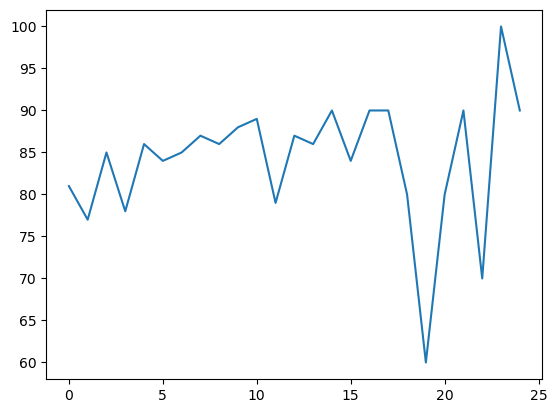

In [15]:
agent1 = DQN()

for i in range(1):
    agent1 = train_agent(env,agent1,"random",n_player=1,epoch=100,display_info=False)
    current_history = test_agent(env,agent1,"random",n_player=1,nb_games=NB_GAMES_TEST)
    print(current_history)
    history.append(current_history[1]/nb_games_test * 100)
plt.plot(history)

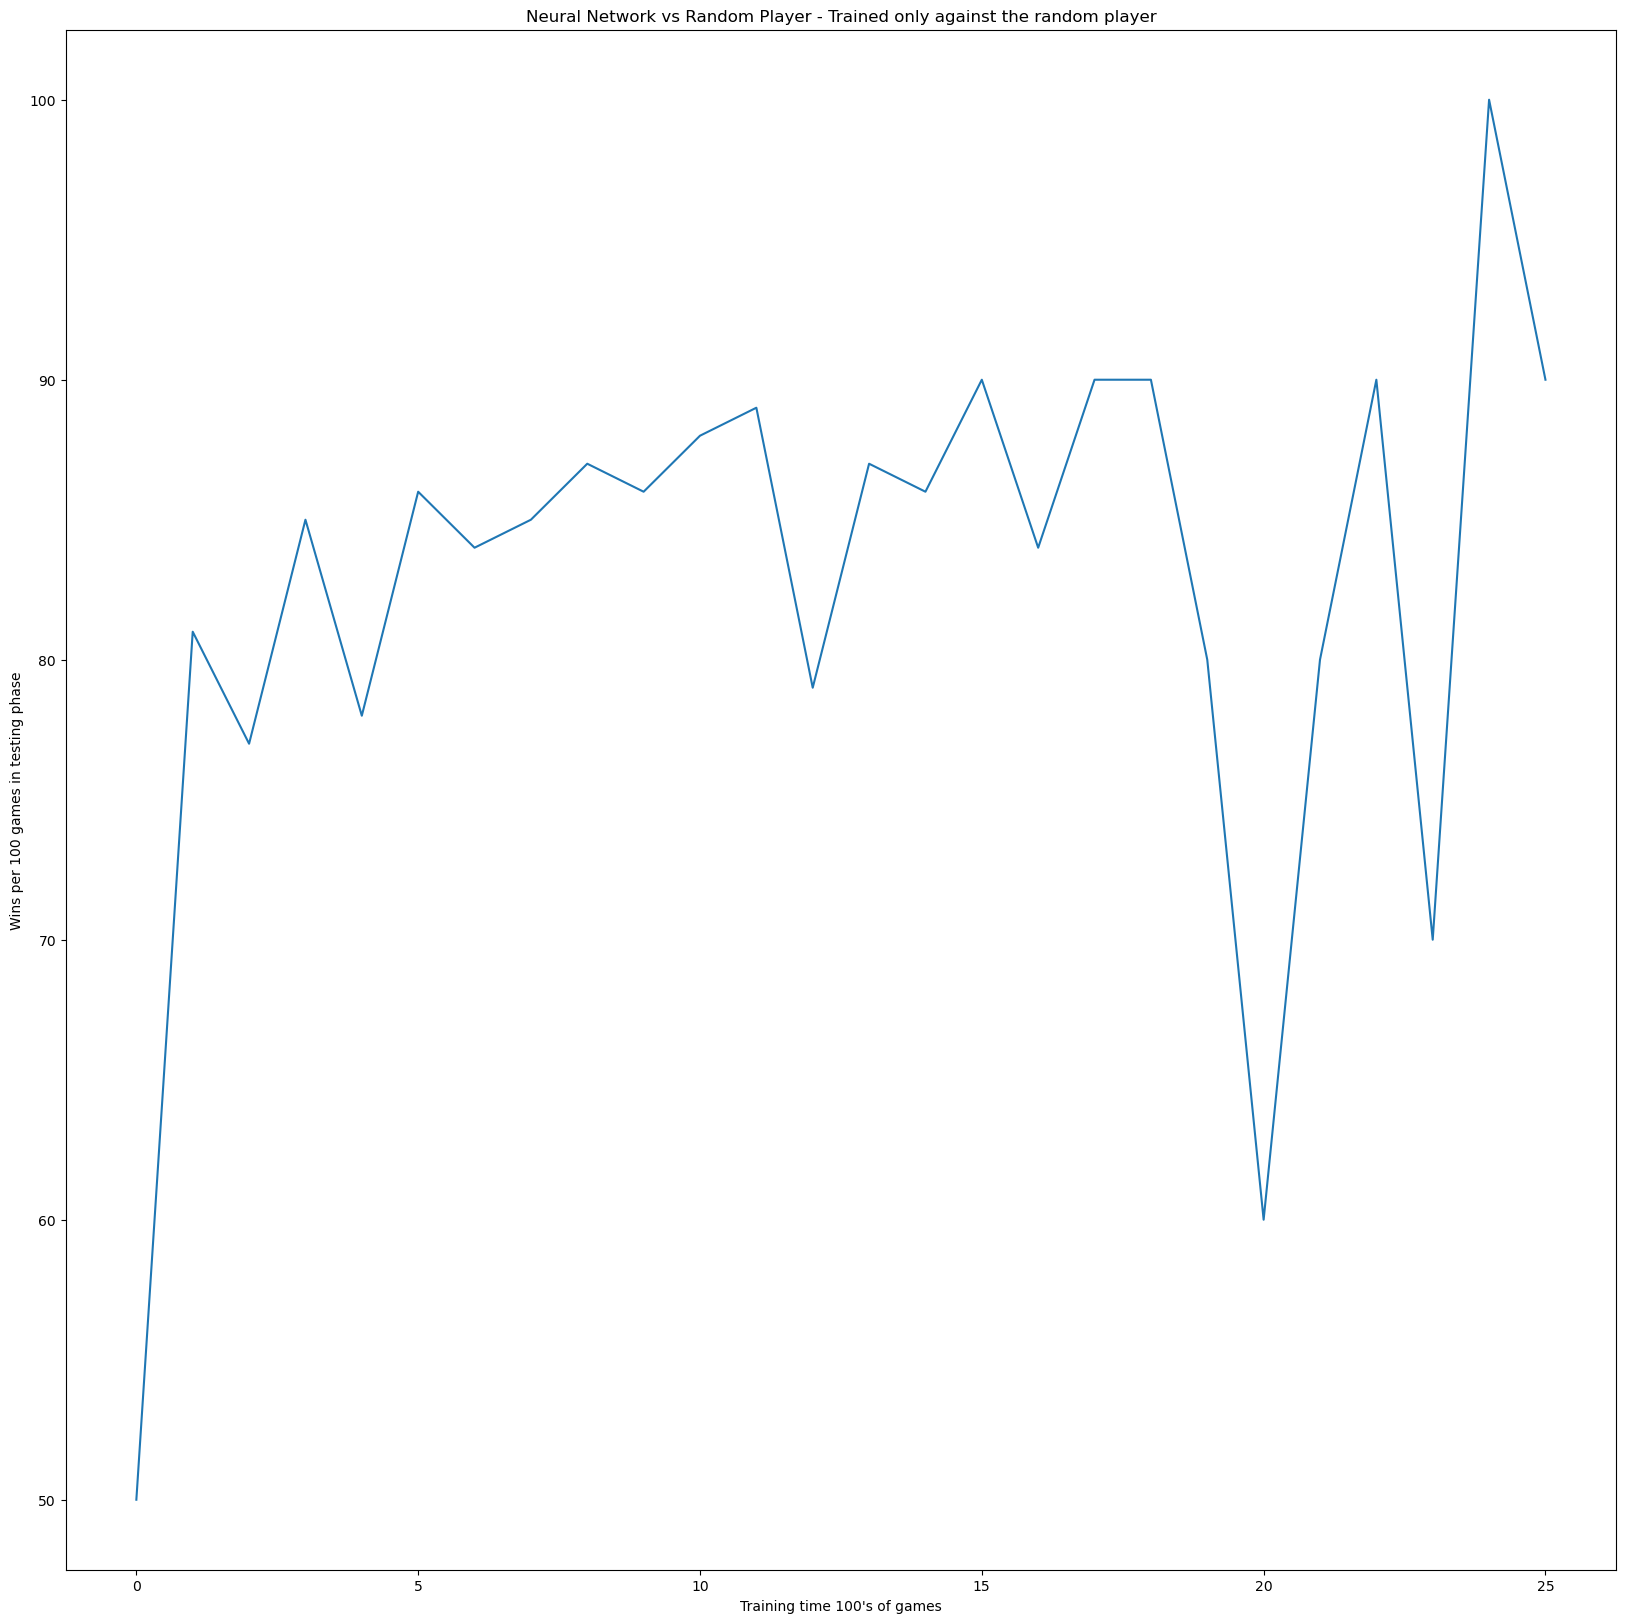

In [16]:
plt.figure(figsize = (20,20))
plt.title("Neural Network vs Random Player - Trained only against the random player")
plt.xlabel("Training time 100's of games")
plt.ylabel("Wins per 100 games in testing phase")
history.insert(0,50)
plt.plot(history)